In [1]:


# Import all modules for lucid visualization

from lucid.modelzoo.vision_base import Model
import tensorflow as tf
import numpy as np
import lucid.optvis.render as render
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import matplotlib.pyplot as plt
import os
from os import mkdir
import lucid.modelzoo.vision_models as models


In [2]:
model = models.InceptionResnet2()
model.load_graphdef()

512 10.380213



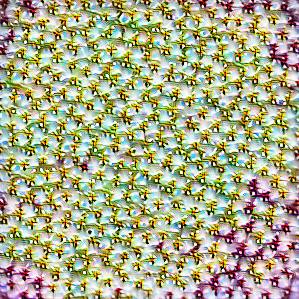

512 13.8914385



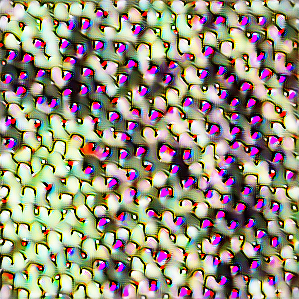

512 13.169921



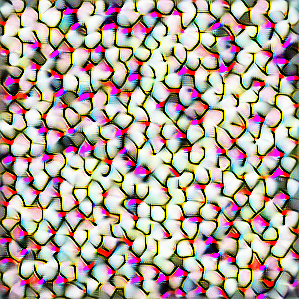

512 12.961895



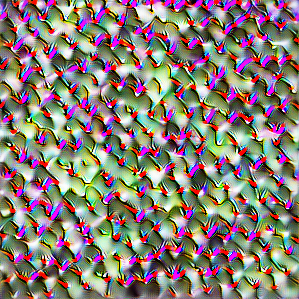

512 16.141216



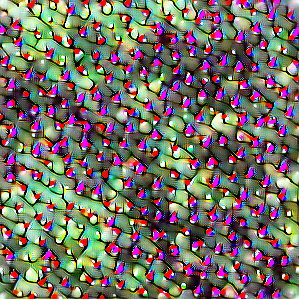

In [3]:

channel = lambda n: objectives.channel('InceptionResnetV2/Mixed_5b/concat', n)

# Creates example objective functions for the first 5 neurons in concat
objs = [channel(i) for i in range(5)]
param_f = lambda: param.image(299)
for ind_obj, obj in enumerate(objs):
    _ = render.render_vis(model, obj, param_f)

0 0.0043470464



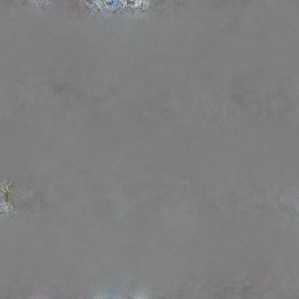

1000 9.407926



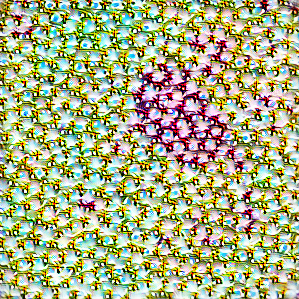

2000 11.939281



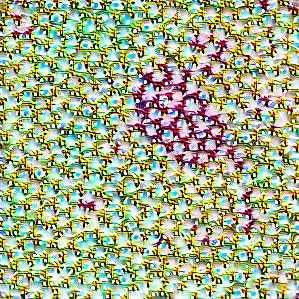

3000 12.154844



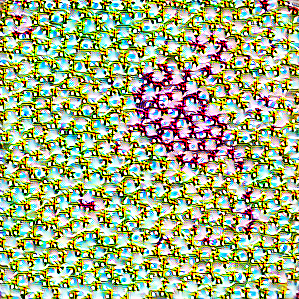

4000 12.572555



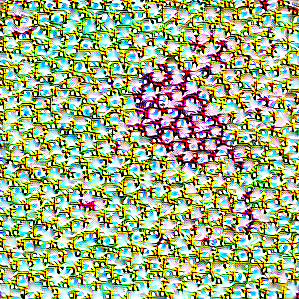

5000 12.816906



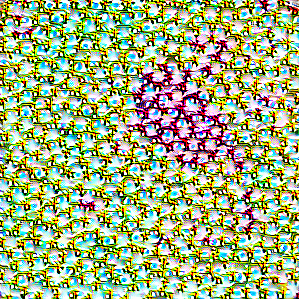

6000 12.797555



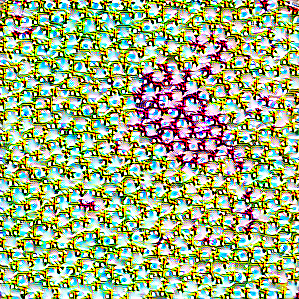

7000 10.801998



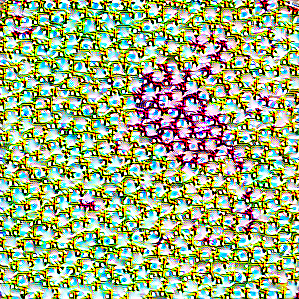

8000 12.972124



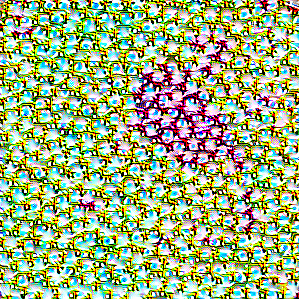

9000 13.265257



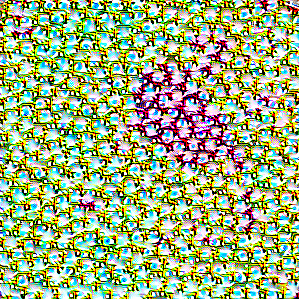

0 0.0



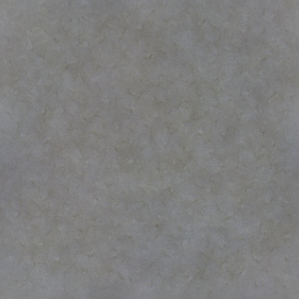

1000 16.104376



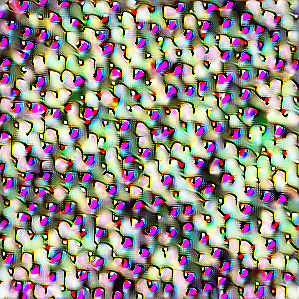

2000 16.078564



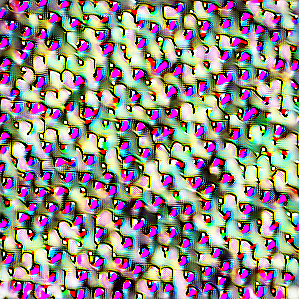

3000 17.41266



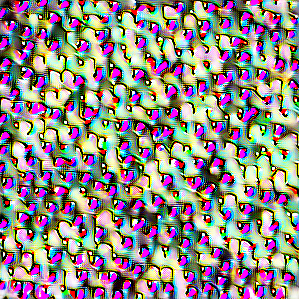

In [ ]:
channel = lambda n: objectives.channel('InceptionResnetV2/Mixed_5b/concat', n)

# Creates example objective functions for the first 5 neurons in concat
objs = [channel(i) for i in range(5)]
param_f = lambda: param.image(299)
for ind_obj, obj in enumerate(objs):
    _ = render.render_vis(model, obj, param_f, thresholds=np.arange(0,10000,1000))

In [ ]:


# Iterate over all objectives you created for different neurons

def makedir(path):
    if not os.path.exists(path):
        mkdir(path)
        
master_output_path = './Lucid-Visualizations' # This is the directory where all visualizations will be stored as npy's
makedir(master_output_path)

# Feel free to substitute 'Conv2D' with any kind of layer you would like to visualize
all_convs = [node.name for node in eid.graph_def.node if 'concat' in node.name]

for layer in all_convs:
    print 'Rendering visualizations for layer %s'%(layer)
    
    # Create directories to store rendered visualizations
    
    curr_conv_layer = '_'.join(layer.split('/'))
    layer_output_path = os.path.join(master_output_path,
                                        curr_conv_layer)
    makedir(layer_output_path)
    
    # Create objective functions for the current layer (sample code for first 5 neurons)
    channel = lambda n: objectives.channel(layer, n)
    
    # Objectives declared below create visualizations for the first 10 neurons in each layer. 
    objs = [channel(i) for i in range(10)]
    
    # Main loop for rendering visualizations
    for ind_obj, obj in enumerate(objs):
        print 'Rendering visualizations for neuron-%s'%(ind_obj)

        # Store/display rendered visualizations 
        # upto 1000 iterations, at 200 step intervals
        
        imgs = render.render_vis(eid, obj, param_f, thresholds=np.arange(0,10000,1000))
        curr_layer_fn = 'Visualized_Rendering_%s_%s.npy'%(ind_obj,
                                                          curr_conv_layer)
        curr_layer_path = os.path.join(layer_output_path, curr_layer_fn)
        np.save(curr_layer_path, imgs)
        print 'Saved in %s'%(curr_layer_path)



In [ ]:
import glob
import numpy as np
from scipy.misc import imsave
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
all_viz_dirs = glob.glob('./Lucid-Visualizations/*')
all_np_files = {viz_dir:glob.glob('%s/*npy'%(viz_dir)) for viz_dir in all_viz_dirs}


for viz_dir, vizs in tqdm(all_np_files.iteritems()):
    for viz in tqdm(vizs, desc='Converting visualizations from %s'%(viz_dir)):
        np_viz = np.load(viz)
        imsave(viz.replace('.npy','.png'),np_viz[-1][0])